## IMPORTS

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from ddpg_agent import Agent

## ENVIROMENT

In [2]:
env = UnityEnvironment(file_name='Reacher_Single')
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
# Reset the environment    
env_info = env.reset(train_mode=True)[brain_name]     
# number of agents
num_agents = len(env_info.agents)
# size of each action
action_size = brain.vector_action_space_size
# size of the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('number of agents: ', num_agents)
print('action size: ', action_size)
print('state size: ', state_size)

Mono path[0] = '/Users/gerritdolderer/AI/learn/DRL/deep-reinforcement-learning-master/p2_continuous-control/Reacher_Single.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/gerritdolderer/AI/learn/DRL/deep-reinforcement-learning-master/p2_continuous-control/Reacher_Single.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


number of agents:  1
action size:  4
state size:  33


In [3]:
def take_random_action():
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

### TRAINING RUN

In [4]:
def ddpg(n_episodes=1500, max_t=1000, 
         actor_fc1_units=128, actor_fc2_units=128,
         critic_fcs1_units=128, critic_fc2_units=128,
         gamma=0.99, tau=1e-3, lr_actor=2e-4, lr_critic=2e-4, mu=0., theta=0.15, sigma=0.1):

    agent = Agent(state_size=state_size, action_size=action_size, random_seed=10,
                  actor_fc1_units=actor_fc1_units, actor_fc2_units=actor_fc2_units,
                  critic_fcs1_units=critic_fcs1_units, critic_fc2_units=critic_fc2_units,
                  gamma=gamma, tau=tau, lr_actor=lr_actor, lr_critic=lr_critic,
                  mu=mu, theta=theta, sigma=sigma)

    scores_deque = deque(maxlen=100)
    scores = []

    print("\nTraining:")
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        timestep = 0

        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, timestep)
            
            score += rewards
            timestep += 1
            states = next_states
            if np.any(dones):
                break

        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        avg_score = np.mean(scores_deque)

        print(f'Episode {i_episode}\tScore: {np.mean(score):.2f}\tMoving Average (100): {avg_score:.2f}')
        
        if avg_score > 30 and i_episode >= 100:
            print(f'\nEnvironment solved in {i_episode} episodes with an Average Score of {avg_score:.2f}')
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            return scores
    return scores


In [5]:

def plot_training(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode')
    plt.show()


Training:
Episode 1	Score: 0.36	Moving Average (100): 0.36
Episode 2	Score: 1.06	Moving Average (100): 0.71
Episode 3	Score: 0.39	Moving Average (100): 0.60
Episode 4	Score: 0.45	Moving Average (100): 0.56
Episode 5	Score: 0.58	Moving Average (100): 0.57
Episode 6	Score: 1.74	Moving Average (100): 0.76
Episode 7	Score: 0.86	Moving Average (100): 0.78
Episode 8	Score: 0.78	Moving Average (100): 0.78
Episode 9	Score: 0.20	Moving Average (100): 0.71
Episode 10	Score: 0.31	Moving Average (100): 0.67
Episode 11	Score: 0.22	Moving Average (100): 0.63
Episode 12	Score: 0.00	Moving Average (100): 0.58
Episode 13	Score: 0.00	Moving Average (100): 0.53
Episode 14	Score: 1.00	Moving Average (100): 0.57
Episode 15	Score: 0.21	Moving Average (100): 0.54
Episode 16	Score: 0.35	Moving Average (100): 0.53
Episode 17	Score: 0.19	Moving Average (100): 0.51
Episode 18	Score: 1.56	Moving Average (100): 0.57
Episode 19	Score: 0.30	Moving Average (100): 0.56
Episode 20	Score: 1.14	Moving Average (100): 0.5

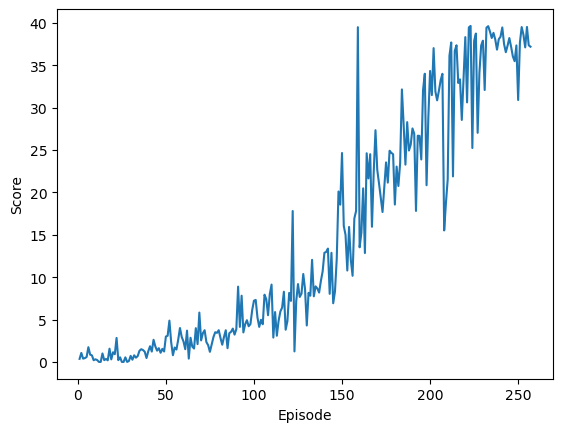

In [6]:
scores = ddpg(n_episodes=3000, max_t=1000, 
              actor_fc1_units=128, actor_fc2_units=128,
              critic_fcs1_units=128, critic_fc2_units=128, 
              gamma=0.98, tau=1e-3, lr_actor=2e-4, lr_critic=2e-4
              ,mu=0., theta=0.15, sigma=0.1 )

plot_training(scores)

### Watch a smart Agent

In [10]:
def play(n_episodes=10, max_t=60, 
         actor_checkpoint='checkpoint_actor.pth', 
         critic_checkpoint='checkpoint_critic.pth'):
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=100)

    agent.actor_local.load_state_dict(torch.load(actor_checkpoint))
    agent.critic_local.load_state_dict(torch.load(critic_checkpoint))

    scores = []
    #1,35

    print("\nPlaying:")
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name]
        states = env_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)

        for t in range(max_t):
            actions = agent.act(states, add_noise = False) 
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            score += rewards
            states = next_states
            if np.any(dones):
                break

        scores.append(np.mean(score))
        print(f'Episode {i_episode}\tScore: {np.mean(score):.2f}')

    avg_score = np.mean(scores)
    print(f'\nAverage Score over {n_episodes} episodes: {avg_score:.2f}')
    return scores


scores = play()


Playing:
Episode 1	Score: 1.82
Episode 2	Score: 0.97
Episode 3	Score: 1.34
Episode 4	Score: 1.81
Episode 5	Score: 1.70
Episode 6	Score: 1.80
Episode 7	Score: 1.82
Episode 8	Score: 1.88
Episode 9	Score: 1.61
Episode 10	Score: 1.22

Average Score over 10 episodes: 1.60


In [8]:
#env.close()